## logistic sigmoid function
We are actually interested in predicting the probability that a certain sample belongs to a particular class. It is called **logistic sigmoid function**, sometimes simply abbreviated to sigmoid function due to its characteristic S-shape:
$$\phi_{logistic}(z) = \frac{1}{1+e^{-z}}$$
This sigmoid function takes real number values as input and transforms them into values in the range $[0, 1]$ with an intercept at $\phi(z)=0.5$.
<br>
Now let us simply plot the sigmoid function for some values in the range $-7$ to $7$ to see how it looks:

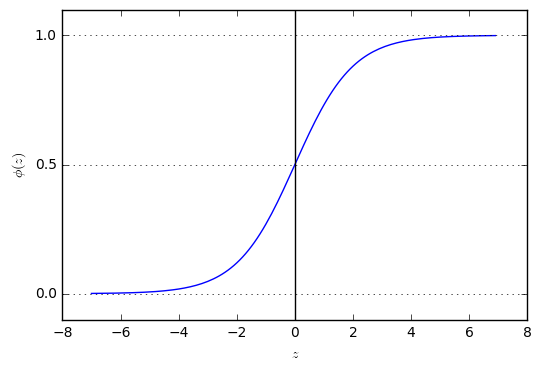

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
    """The sigmoid function."""
    return 1.0 / (1.0 + np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z) * (1 - sigmoid(z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
# The standard way to add vertical lines that will cover entire plot window
# without having to specify their actual height, at 0.0 point
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)  # 设置当前y轴范围
plt.xlabel('$z$')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()        # Get Current Axes, 图中水平虚线
ax.yaxis.grid(True)   # horizontal grid line or ax.xaxis.grid(True) - vertical lines or ax.grid(ax) - both for x and y
plt.show()

In [7]:
# plot ReLU
def ReLU(x):
    return np.maximum(x, 0)

# plot tanh

## Broadening the output spectrum using a hyperbolic tangent
Another sigmoid function that is often used in the hidden layers of artificial neural networks is the **hyperbolic tangent**(commonly known as **tanh**), which can be interpreted as a rescaled version of the logistic function:
$$\phi_{tanh}(z) = 2 \times \phi_{logistic}(2z) - 1 = \frac{e^z - e^{-z}}{e^z + e^{-z}}$$
The advantage of **the hyperbolic tangent** over the logistic function is that it has a broader output spectrum and ranges in the open interval $(-1, 1)$, which can improve the convergence of the backpropagation algorithm. In contrast, the logistic function returns an output signal that ranges in the open interval $(0, 1)$.
<br>
Let's plot the two sigmoid functions:

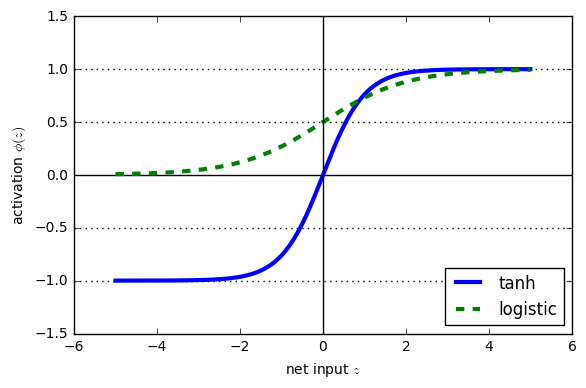

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def tanh(z):
    e_p = np.exp(z)
    e_m = np.exp(-z)
    return (e_p - e_m) / (e_p + e_m)

z = np.arange(-5, 5, 0.005)
log_act = sigmoid(z) # or logistic
tanh_act = tanh(z)
plt.ylim([-1.5, 1.5])
plt.xlabel('net input $z$')
plt.ylabel('activation $\phi(z)$')
plt.axhline(1, color='black', linestyle=':')    # 图形中水平虚线
plt.axhline(0.5, color='black', linestyle=':')
plt.axhline(0, color='black')
plt.axhline(-0.5, color='black', linestyle=':')
plt.axhline(-1, color='black', linestyle=':')
plt.plot(z, tanh_act, linewidth=3, label='tanh')
plt.plot(z, log_act, linewidth=3, linestyle='--', label='logistic')
plt.legend(loc='lower right')
plt.axvline(0.0, color='k')
plt.tight_layout()  # 紧凑显示图片
plt.show()

## Derivatives and Vectorization
### Scalar Case: Scalar in, Scalar out
The concept of a **derivative** in the scalar case: given a function $f: \mathbb R \rightarrow \mathbb R$. Derivatives are a way to measure _change_.
<br>
Write $\frac{\partial y}{\partial x}$ for the derivative of $y$ with respect to $x$. This notation emphasizes that $\frac{\partial y}{\partial x}$ is the _rate of change_ between the variables $x$ and $y$; concretely if $x$ were to change by $\epsilon$ then $y$ will change by approximately $\epsilon\frac{\partial y}{\partial x}$. We can write this relationship as:
$$x \rightarrow x + \Delta{x} \Longrightarrow y \rightarrow \approx y + \frac{\partial y}{\partial x}\Delta{x}$$
You should read this as saying "changing $x$ to $x + \Delta{x}$ implies that $y$ will change to approximately $y + \Delta{x}\frac{\partial y}{\partial x}$".

### Gradient: Vector in, Scalar out
This same intuition carries over into the vector case. Now suppose that $f: \mathbb R^N \rightarrow \mathbb R$ takes a vector as input and produces a scalar. The derivative of $f$ at the point $x \in \mathbb R^N$ is now called the **gradient**. The gradient $\nabla_xf(x) \in \mathbb R$ is a vector, with the same intuition as the scalar case.
$$x \rightarrow x + \Delta{x} \Longrightarrow y \rightarrow \approx y + \frac{\partial y}{\partial x}\Delta{x}$$
$x$, $\Delta{x}$, and $\frac{\partial y}{\partial x}$ are now _vectors_ in $\mathbb R^N$ while $y$ is a scalar.
<br>
We can view the gradient $\frac{\partial y}{\partial x}$ as a vector of partial derivatives:
$$\frac{\partial y}{\partial x}=\left(\frac{\partial y}{\partial x_1},\frac{\partial y}{\partial x_2}\ldots\frac{\partial y}{\partial x_N}\right)$$
where $x_i$ is the $i$th coordinate of the vector $x$, which is a scalar, so each partial derivative $\frac{\partial y}{\partial x_i}$ is also a scalar.

### Jacobian: Vector in, Vector out
Now suppose that $f: \mathbb R^N \rightarrow \mathbb R^M$ takes a vector as input and produces a vector as output. Then the derivative of $f$ at a point $x$, also called the **Jacobian**, is the $M \times N$ matrix of partial derivatives. If we set $y=f(x)$ then we can write:
$$\frac{\partial y}{\partial x}=\begin{pmatrix}\frac{\partial y_1}{\partial x_1} & \cdots & \frac{\partial y_1}{\partial x_N}\\ \vdots & \ddots & \vdots \\ \frac{\partial y_M}{\partial x_1} & \cdots & \frac{\partial y_M}{\partial x_N}\end{pmatrix}$$
The Jacobian tells us the relationship between each element of $x$ and each element of $y$: the $(i, j)$-th element $\frac{\partial y}{\partial x}$ is equal to $\frac{\partial y_i}{\partial x_j}$, so it tells us the amount by which $y_i$ will change if $x_j$ is changed by a small amount. Just as in the previous cases, the Jacobian tells us the relationship between changes in the input and changes in the output:
$$x \rightarrow x + \Delta{x} \Longrightarrow y \rightarrow \approx y + \frac{\partial y}{\partial x}\Delta{x}$$
Here $\frac{\partial y}{\partial x}$ is a $M \times N$ matrix and $\Delta{x}$ is a $N$-dimensional vector, so the product $\frac{\partial y}{\partial x}\Delta{x}$ is a matrix-vector multiplication resulting in an $M$-dimensional vector.
<br>
The chain rule can be extended to the vector case using _**Jacobian matrices**_. Suppose that $f:\mathbb R^N \rightarrow \mathbb R^M$ and $g:\mathbb R^M \rightarrow \mathbb R^K$. Let $x \in \mathbb R^N$, $y \in \mathbb R^M$, and $z \in \mathbb R^K$ with $y = f(x)$ and $z = g(y)$, so we have the same _computational graph_ as the scalar case:
$$x \xrightarrow{f} y \xrightarrow{g} z$$
The _**chain rule**_ also has the same form as the scalar case:
$$\frac{\partial z}{\partial x} = \frac{\partial z}{\partial y}\frac{\partial y}{\partial x}$$
However now each of these terms is a matrix: $\frac{\partial z}{\partial y}$ is $K \times M$ matrix, $\frac{\partial y}{\partial x}$ is a $M \times N$ matrix, and $\frac{\partial z}{\partial x}$ is $K \times N$ matrix; the multiplication of $\frac{\partial z}{\partial y}$ and $\frac{\partial y}{\partial x}$ is the _**matrix multiplication**_.



### Generalized Jacobian: Tensor in, Tensor out
#### What is a tensor and why does it flow? (Tensors = Containers)
A tensor is the basic building block of modern machine learning. At its core it's a _**data container**_. Mostly it contains numbers. Sometimes it even contains strings, but that's rare. So think of it as a bucket of numbers. There are multiple sizes of tensors. Let's go through the most basic ones that you'll run across in deep learning, which will be between 0 and 5 dimensions. We can visualize the various of tensors like this:


##### 1 - 0D Tensors (Scalars) (零维)
Every number that goes into a tensor/container bucket is called a "_**scalar**_". _**A scalar is a single number.**_ Why don't they just call it a number you ask? I don't know. Maybe math peeps just like to sound cool? Scalar does sound cooler than number. In fact you can have a single number tensor, which we call a 0D tensor, aka a tensor with 0 dimension. It's nothing more than a bucket with a one number in it. Imagine a bucket with a single drop of water and you have a 0D tensor.
<br>
In python, these tensors are typically stored in NumPy arrays. NumPy is a scientific library for manipulating numbers that is used by pretty much every AI framework on the planet. Why the heck would we want to turn data into a NumPy array? Simple. Because we need to transform any input of data, be that strings of text, images, stock prices, or video into _a universal standard_ that we can work with easily.

In [22]:
# Scalars or 0D Tensors
import numpy
x = np.array(5)
print(x)

5


#### 2 - 1D Tensors (Vectors)
If you're a programmer, you already know about something similar to a 1D tensor: _**an array**_. Every programming language has arrays, which are nothing but a string of data chunks in a single row or column. In deep learning this is called a 1D tensor. _**Tensors are defined by how many axes they have in total.**_ A 1D tensor has exactly one axis. _**A 1D tensor is called a vector**_. We can visulize a vector as a single column or row of numbers. If we want to see this in NumPy, we could do the following:

In [24]:
import numpy as np
x = np.array([1, 2, 3, 4])
print(x)
x.ndim  # Visualize how many axes a tensor has

[1 2 3 4]


1

#### 3 - 2D Tensors
You probably already know about another kind of tensor: _**a matrix**_. _** A 2D tensor is called a matrix**_. We can visualize this as a grid of numbers with rows and columns. Those columns and rows represent two axes. A matrix is a 2D tensor, meaning it is two dimensional, aka a tensor with 2 axes. In NumPy, we would represent that as: (A tensor has a "shape". The shape is a bucket that fits our data perfectly and defines the maximum size of our tensor. A tensor can be transformed or manipulated so that columns become rows and vice versa.)

In [26]:
import numpy as np
x = np.array([[5, 10, 15, 30, 25], [20, 30, 65, 70, 90], [7, 80, 95, 20, 30]])
print(x)

[[ 5 10 15 30 25]
 [20 30 65 70 90]
 [ 7 80 95 20 30]]


#### 4 - 3D Tensors
**This is where tensors really start to get useful.** Often we have to store a number of examples of 2D tensors in their own bucket, which gives us a 3D tensor. A 3D tensor is a cube of numbers! We can keep stacking cubes together to create bigger and bigger tensors to encode different types of data, aka 4D tensors, 5D tensors and so on to N. Actually, a 3D tensor might be better visualized as a layer of grids. 
<br>
In NumPy we could represent it as follows:

In [28]:
import numpy as np
x = np.array([[[5,10,15,30,25],
               [20,30,65,70,90],
               [7,80,95,20,30]],
               [[3,0,5,0,45],
               [12,-2,6,7,90],
               [18,-9,95,120,30]],
               [[17,13,25,30,15],
               [23,36,9,7,80],
               [1,-7,-5,22,3]]])
print(x)
x.ndim  # A 3D tensor has 3 axes

[[[  5  10  15  30  25]
  [ 20  30  65  70  90]
  [  7  80  95  20  30]]

 [[  3   0   5   0  45]
  [ 12  -2   6   7  90]
  [ 18  -9  95 120  30]]

 [[ 17  13  25  30  15]
  [ 23  36   9   7  80]
  [  1  -7  -5  22   3]]]


#### Common Data Stored in Tensors
Here are some common types of datasets that we store in various types of tensors:
* 3D = Time series
* 4D = Images
* 5D = Videos
In almost every one of these tensors, the common thread will be sample size. Sample size is the number of things in the set. That would be the number of images, the number of videos, the number of documents. Think of the various dimensions in the shape as fields. We are looking for the minimum number of fields that describe the data. For example, an image is really represented by three fields, like this: (width, height, color_depth) = 3D. But we don't usually work with a single image in machine learning. We have a set. We have a 4D tensor, like this (sample_size, width, height, color_depth) = 4D.
#### Images and Color Images
4D tensors are great at storing a series of images like Jpegs. An image is stored with three parameters: **Height, Width, Color depth**. The image is a 3D tensor, but the set of images makes it 4D. The famous MNIST data set is a series of handwritten numbers. The MNIST images are gray scale, which means that they could be encoded as a 2D tensor, however all images are traditionally encoded as 3D tensors, with the third axis being a representation of color depth. There are 60,000 images in the MNIST dataset. They are (28 pixels wide $\times$ 28 pixels high). They have a color depth of 1, which represents gray scale. So we could say the 4D tensor for the MNIST dataset has a shape of: (sample_size, height, width, color_depth) = (60000, 28, 28, 1). Color photos can have different color depths, depending on their resolution and encoding. A typical JPG image would use RGB and so it would have a color depth of 3, one each for each red, green, blue.

#### 5 - 5D Tensors
A 5D tensor can store video data. In TensorFlow video data is encoded as: (sample\_size, frames, width, height, color\_depth. If we took a five minute video (60 seconds $\times$ 5 = 300), at 1080p HD, which is (1920 pixels $\times$ 1080 pixels), at 15 sampled frames per second, which gives us 300 seconds $\times$ 15 = 4500 with a color depth of 3, we would store that a 4D tensor that looks like this: (4500, 1920, 1080, 3). So if we had 10 videos, we would have a 5D tensor of shape: (10, 4500, 1920, 1080, 3). **Actually this example is totally insane. The size of the tensor would be absolutely ridiculous, over a terabyte**. Know that in the real world, we would want to down-sample the video as much as possible to make it more realistic to deal with or we would be training this model until end of time. The number of values in this 5D tensor would be:
$$10 \times 4500 \times 1920 \times 1080 \times 3 = 279,936,000,000$$
Each of these values would be stored as a 32 bit number, which means that we multiply the total number of values by 32 to transform it into bits and then convert it to Terabytes:
$$279,936,000,000 \times 32 = 8,957,952,000,000\;bit = 1.119744\; Terabyte$$
<br>
Actually, I used this insane example for a reason. You just got your first lesson in _**pre-processing**_ and _**data-reduction**_. You can’t just hurl data at an AI model with no work on your part. You have to massage and shrink the data to make it easier to work with efficiently. Reduce the resolution, drop unneeded data (aka deduping), limit the number of frames you use, etc, etc. That is the work of a data scientists. If you can’t munge the data, you can’t do anything useful with it.
<br>
**Learn how to do various transformations on the tensors. In other words, we'll make the tensors "flow".**

#### The machine learning definition of  a Tensor
Just as _**a vector**_ is a one-dimensional list of numbers and _**a matrix**_ is a two-dimensional grid of numbers, a tensor is a D-dimensional grid of numbers. _**A vector**_ is a tensor of rank 1, _**a matrix**_ is a tensor of rank 2. For a tensor with more than 2 dimensions, we refer to it as _**a tensor**_. Note that, rank of a matrix from linear algebra is not the same as tensor rank.
<br>
Many operations in deep learning accept _**tensors**_ as inputs and produce _**tensors**_ as outputs. For example an image is usually represented as a three-dimensional grid of numbers, where the three dimensions correspond to the height, width, and color channels (red, green, blue) of the image. **We must therefore develop a derivative that is compatible with functions operating on general tensors.**
<br>
Suppose now that $f:\mathbb R^{N_1\times \cdots \times N_{D_x}} \rightarrow \mathbb R^{M_1\times \cdots \times M_{D_y}}$. Then the input to $f$ is a $D_x$-dimensional tensor of shape $N_1 \times \cdots \times N_{D_x}$, and the output of $f$ is a $D_y$-dimensional tensor of shape $M_1 \times \cdots \times M_{D_y}$. If $y = f(x)$ then the derivative $\frac{\partial y}{\partial x}$ is a _**generalized Jacobian**_, which is an object with shape:
$$(M_1 \times \cdots \times M_{D_y})\times(N_1 \times \cdots \times N_{D_x})$$
Note that we have separated the dimensions of $\frac{\partial y}{\partial x}$ into two groups: the first group matches the dimensions of $y$ and the second group matches the dimension of $x$. With this grouping, we can think of the generalized Jacobian as generalization of a matrix, where each "row" has the same shape as $y$ and each "column" has the same shape as $x$.

### Computation Graph (Computational Graphs)
How to use it to figure out derivative calculations? Computational graphs are a nice way to think about mathematical expressions.
**Derivatives on Computational Graphs**
<br>
**Forward-mode differentiation** starts at an input to the graph and moves towards the end. At every node, it sums all the paths feeding in. Each of those paths represents one way in which the input affects that node. By adding them up, we get the total way in which the node is affected by the input, it's derivative.
**Reverse-mode differentiation**, on the other hand, starts at an output of the graph and moves towards the beginning. At each node, it merges all paths which originated at that node.
<br>
**Forward-mode differentiation** tracks how one input affects every node. **Reverse-mode differentiation** tracks how every node affects one output. That is, forward-mode differentiation applies the operator $\frac{\partial}{\partial X}$ to every node, while revese mode differentiation applies the operator $\frac{\partial Z}{\partial}$ to every node. 
<br>
At this point, you might wonder why anyone would care about reverse-mode differentiation. It looks like a strange way of doing the same thing as the forward-mode. Is there some advantage? 


http://colah.github.io/posts/2015-08-Backprop/

### Example
$f(x, W) = ||W\cdot x||^2 = \sum_{i=1}^{n}(W \cdot x)_i^2 \quad x \in \mathbb R^n \;, W \in \mathbb R^{n \times n}$
<br>
$$q = W \cdot x = \begin{pmatrix} W_{1,1}x_1 + \cdots + W_{1,n}x_n \\ \vdots \\ W_{n,1}x_1 + \cdots + W_{n,n}x_n\end{pmatrix}, \quad f(q) = ||q||^2 = q_1^2 + \cdots + q_n^2$$
<br>
$$W = \begin{bmatrix} 0.1 & 0.5 \\ -0.3 & 0.8 \end{bmatrix}, \quad x = \begin{bmatrix} 0.2 \\ 0.4 \end{bmatrix}$$
Compute the derivatives:
$$\frac{\partial f}{\partial q_i} = 2q_i \Longrightarrow \nabla_q\,f = 2q$$
<br>
$$\frac {\partial q_k}{\partial W_{i,j}} = 1_{k=i}x_j, \quad \frac {\partial f}{\partial W_{i,j}} = \sum_k \frac{\partial f}{\partial q_k}\frac {\partial q_k}{\partial W_{i,j}} = \sum_k (2q_k)(1_{k=i}x_j)=2q_ix_j \Longrightarrow \nabla_W\,f = 2q \cdot x^T$$
<br>
$$\frac{\partial q_k}{\partial x_i} = W_{k,i} \Longrightarrow \frac{\partial f}{\partial x_i} = \sum_k \frac{\partial f}{\partial q_k}\frac{\partial q_k}{\partial x_i} = \sum_k 2q_kW_{k,i} \Longrightarrow \nabla_x\,f = 2W^T\cdot q$$